In [6]:
import skfda
from skfda.exploratory.visualization.clustering import (
    plot_clusters, plot_cluster_lines, plot_cluster_bars)
from skfda.ml.clustering import KMeans, FuzzyCMeans

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

# Summary 

Following [this](https://fda.readthedocs.io/en/latest/auto_examples/plot_clustering.html) tutorial. 

In [7]:
dat = pd.read_csv('../data/clover_all_cell.csv')
dat.head()

track_index       0.0       0.2       0.5  \
0  87_1000221723_heya8_cdk2_mdmx__untreated  0.716859  0.613327  0.558718   
1  86_1000211961_heya8_cdk2_mdmx__untreated  0.431360  0.455203  0.467835   
2  87_1000222005_heya8_cdk2_mdmx__untreated  0.925348  0.867862  0.810377   
3  87_1000221880_heya8_cdk2_mdmx__untreated  0.510213  0.494247  0.608308   
4   2_1000007033_heya8_cdk2_mdmx__untreated  0.727552  0.677675  0.564581   

        0.8       1.0       1.2       1.5       1.8       2.0  ...      20.0  \
0  0.588335  0.624356  0.586035  0.565107  0.601025  0.574367  ...  0.908067   
1  0.434578  0.435951  0.367845  0.395783  0.386936  0.469809  ...  0.718739   
2  0.752892  0.802330  0.791280  0.780230  0.880654  0.890546  ...  0.673668   
3  0.703314  0.756138  0.802310  0.827721  0.802502  0.750039  ...  0.717701   
4  0.701329  0.794484  0.754134  0.708484  0.740395  0.758439  ...  0.281985   

       20.2      20.5      20.8      21.0      21.2      21.5  site  \
0  0.876621  0.992150  0.732915  0.996316  0.732172  0.914643    87   
1  0.849368  1.002122  0.712759  0.943944  0.919513  0.901095    86   
2  0.699035  0.717837  0.820469  0.825380  0.830841  0.900079    87   
3  0.810534  0.866702  0.714824  0.845721  0.920741  0.963850    87   
4  0.355581  0.382703  0.359962  0.481656  0.519449  0.495301     2   

              cell__treatment    median  
0  heya8_cdk2_mdmx__untreated  0.852249  
1  heya8_cdk2_mdmx__untreated  0.849368  
2  heya8_cdk2_mdmx__untreated  0.824277  
3  heya8_cdk2_mdmx__untreated  0.808875  
4  heya8_cdk2_mdmx__untreated  0.798166  

[5 rows x 91 columns]

In [8]:
clover = skfda.representation.grid.FDataGrid(dat[dat.columns[1:-3]].values, 
                                    grid_points=[float(x) for x in dat.columns[1:-3]],
                                    sample_points=None, 
                                    domain_range=None, 
                                    dataset_label=None, 
                                    dataset_name='clover', 
                                    argument_names=None, 
                                    coordinate_names=None, 
                                    sample_names=dat.track_index.values, 
                                    axes_labels=None, 
                                    extrapolation=None, 
                                    interpolation=None)

In [20]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(clover)
dat = dat.assign(kmeans_clus =kmeans.predict(clover))

dat = dat.assign(clus_1=lambda x: x.kmeans_clus==0)
dat = dat.assign(clus_2=lambda x: x.kmeans_clus==1)
dat = dat.assign(clus_3=lambda x: x.kmeans_clus==2)
dat = dat.assign(clus_4=lambda x: x.kmeans_clus==3)
dat = dat.assign(clus_5=lambda x: x.kmeans_clus==4)

In [23]:
dat.groupby(['cell__treatment'])[['clus_1', 'clus_2', 'clus_3', 'clus_4', 'clus_5']].sum()

clus_1  clus_2  clus_3  clus_4  clus_5
cell__treatment                                                           
heya8_cdk2_mdmx__bmn673                  2       6      26      18      20
heya8_cdk2_mdmx__bmn673+trametinib      57      56       0       8       4
heya8_cdk2_mdmx__etoposide               9       9       5      11       3
heya8_cdk2_mdmx__trametinib             47      49       1       8       0
heya8_cdk2_mdmx__untreated               0       1     114      57      51

In [35]:
f = plt.figure(figsize=(20,10))
plot_clusters(kmeans, 
              clover,
             fig=f)
plt.show()

# Fuzzy k-means 

In [53]:
fuzzy_kmeans = FuzzyCMeans(n_clusters=10, random_state=0)
fuzzy_kmeans.fit(clover)

FuzzyCMeans(n_clusters=10)

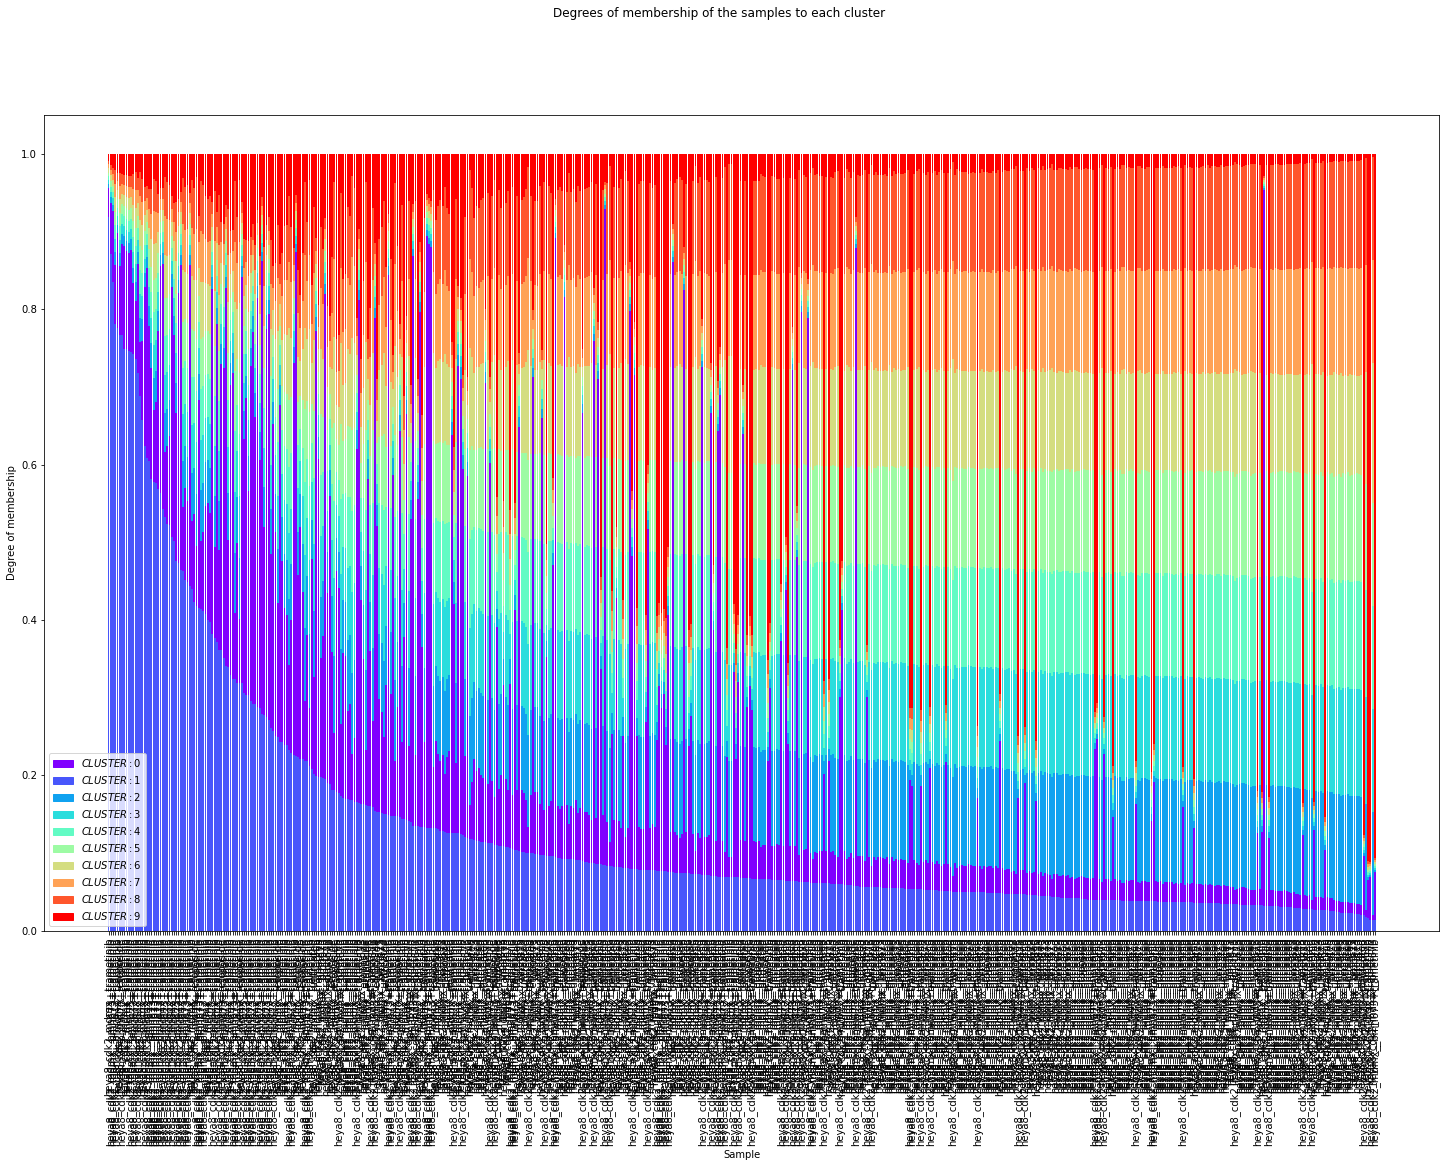

In [54]:
f = plt.figure(figsize=(25,15))
_ = plot_cluster_bars(fuzzy_kmeans, clover, sample_labels=dat.cell__treatment, fig=f, sort=1)
plt.xticks(rotation=90)
plt.show()